In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("G:/Machine Learning/ML_project/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
df = df[['Age', 'Gender', 'Academic Pressure', 'CGPA', 'Depression']]
df.info()
df.describe()
df['Gender'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                27901 non-null  float64
 1   Gender             27901 non-null  object 
 2   Academic Pressure  27901 non-null  float64
 3   CGPA               27901 non-null  float64
 4   Depression         27901 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


Gender
Male      15547
Female    12354
Name: count, dtype: int64

In [4]:
# Remove duplicates if any
df = df.drop_duplicates()

# Check for null values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

Age                  0
Gender               0
Academic Pressure    0
CGPA                 0
Depression           0
dtype: int64


In [5]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female=0, Male=1

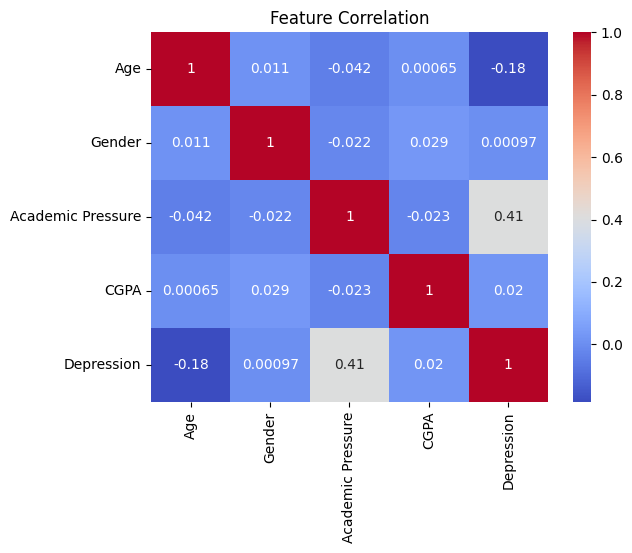

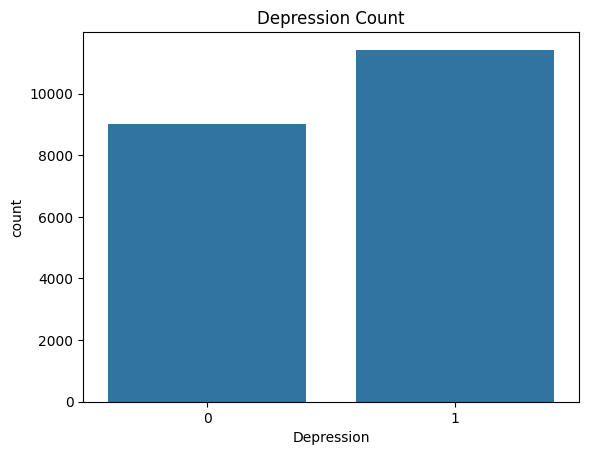

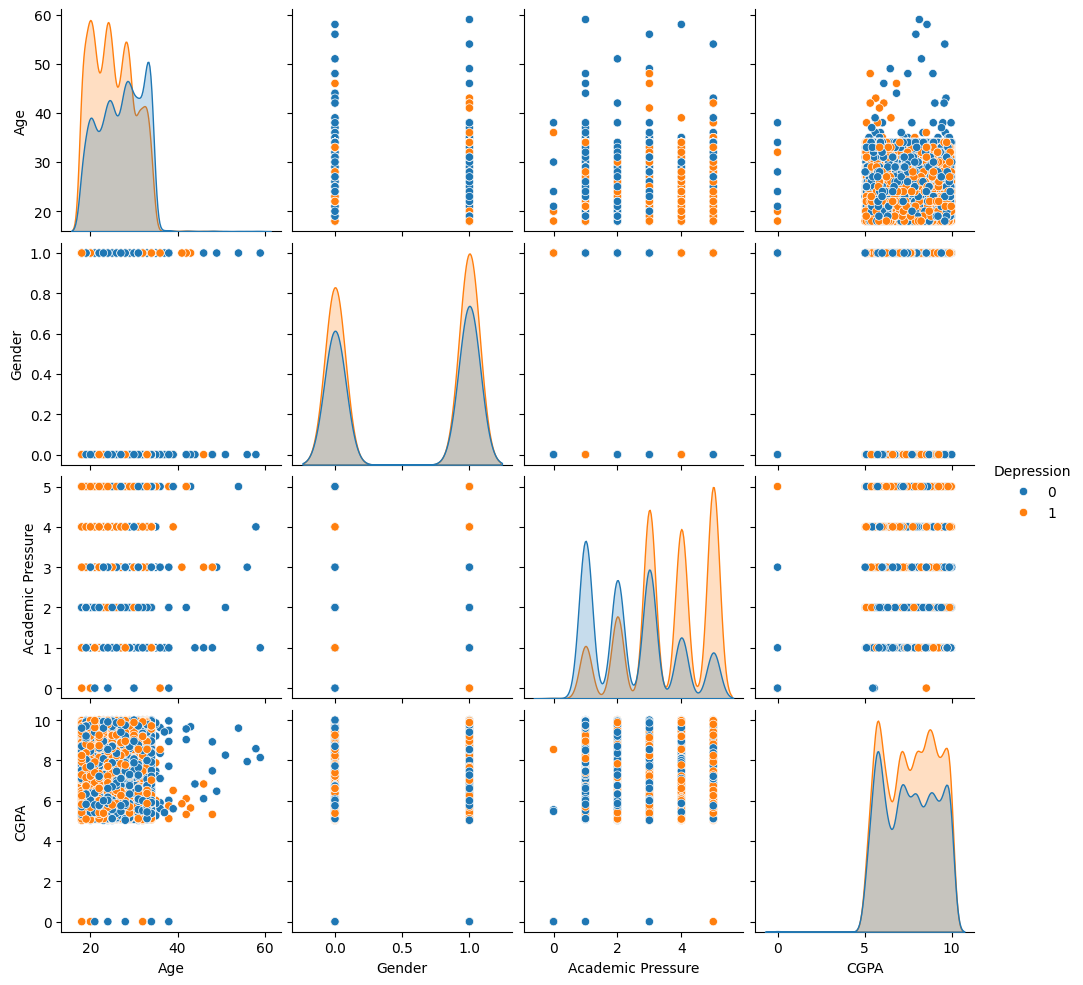

In [6]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Depression distribution
sns.countplot(x='Depression', data=df)
plt.title("Depression Count")
plt.show()

# Pair plot
sns.pairplot(df, hue='Depression')
plt.show()

In [7]:
X = df[['CGPA', 'Age', 'Gender', 'Academic Pressure']]
y = df['Depression']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

C:\Users\Yuvraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [10]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1143  682]
 [ 528 1736]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1825
           1       0.72      0.77      0.74      2264

    accuracy                           0.70      4089
   macro avg       0.70      0.70      0.70      4089
weighted avg       0.70      0.70      0.70      4089



In [39]:
# Function to predict depression from user input
def predict_depression(cgpa, age, gender_str, academic_pressure):
    # Encode gender
    gender = 1 if gender_str.lower() == 'male' else 0

    # Create a DataFrame for scaling
    input_df = pd.DataFrame([[cgpa, age, gender, academic_pressure]],
                            columns=['CGPA', 'Age', 'Gender', 'Academic Pressure'])

    # Scale the input
    input_scaled = scaler.transform(input_df)

    # Predict using the trained model
    prediction = model.predict(input_scaled)

    # Map prediction to output
    return "Likely to have Depression 😟" if prediction[0] == 1 else "Not Likely to have Depression 🙂"

In [40]:
# Example input
result = predict_depression(cgpa=9.9, age=20, gender_str='male', academic_pressure=1)
print(result)

Not Likely to have Depression 🙂


In [42]:
import joblib

# Save trained model
joblib.dump(model, 'depression_model.joblib')

# Save the scaler too (important for consistent input processing)
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']